# Workshop - Clustering Project Solutions

## 1. Data Prep
You need to complete the following:
1. Read in the data file: wholesale_clients.csv
2. Remove the unused columns
3. standardize the data

In [4]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
# 1. Read in the data file wholesale_clients.csv
data = pd.read_csv('wholesale_clients.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# 2. Remove the Channel (restaurant, hotel, etc.) and Region columns since they are not fields we want to model on
data = data.iloc[:, 2:]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [7]:
# c. Note the number of rows and columns
data.shape

(440, 6)

In [8]:
# 3. Standardize the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [9]:
# Double check that all the column means are 0 and standard deviations are 1
data_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


### 2. Compare Different Clustering Techniques
For each of the following FOUR models, fit the model on the scaled data, note down the number of data points in each cluster and record the silhouette score:
1. K-Means with 3 clusters
2. K-Means with 5 clusters
3. Hierarchical Clustering with 2 clusters
4. DBSCAN with esp = 3.5, min_samples = 2 clusters

### 2.1. K-Means Clustering with 3 clusters

In [10]:
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data_scaled)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


### 2.2. K-Means Clustering with 5 clusters

In [11]:
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans5.fit(data_scaled)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


### 2.3. Hierarchical Clustering with 5 clusters


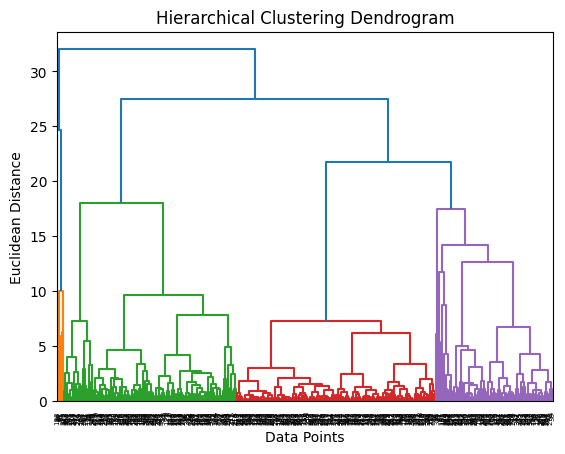

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram


linkage_matrix = linkage(data_scaled, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=20)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [13]:
#  Fit an agglomerative clustering model on the scaled data set with the 5 clusters and view the number of data points in each cluster
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
agg5 = AgglomerativeClustering(5)
agg5.fit(data_scaled)

Counter(agg5.labels_)

Counter({np.int64(4): 177,
         np.int64(0): 153,
         np.int64(2): 104,
         np.int64(1): 5,
         np.int64(3): 1})

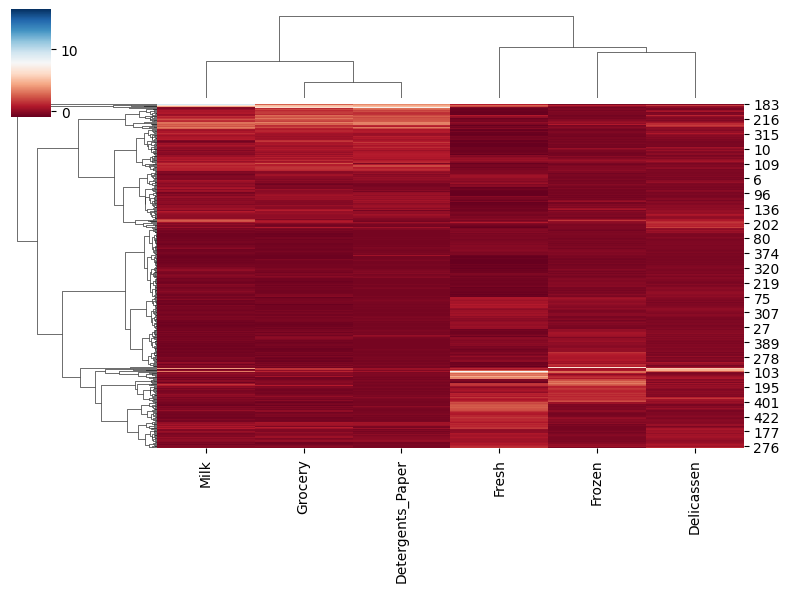

In [14]:
# Create a cluster map of the model you just fit
import seaborn as sns
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns)
plt.show()

### 2.4. DBSCAN with 2 clusters
set eps = 3.5, min_samples =2

In [15]:
from sklearn.cluster import DBSCAN
dbscan2 = DBSCAN(eps=3.5, min_samples=2)
dbscan2.fit(data_scaled)

,"eps eps: float, default=0.5The maximum distance between two samples for one to be consideredas in the neighborhood of the other. This is not a maximum boundon the distances of points within a cluster. This is the mostimportant DBSCAN parameter to choose appropriately for your data setand distance function. Smaller values generally lead to more clusters.",3.5
,"min_samples min_samples: int, default=5The number of samples (or total weight) in a neighborhood for a point tobe considered as a core point. This includes the point itself. If`min_samples` is set to a higher value, DBSCAN will find denser clusters,whereas if it is set to a lower value, the found clusters will be moresparse.",2
,"metric metric: str, or callable, default='euclidean'The metric to use when calculating distance between instances in afeature array. If metric is a string or callable, it must be one ofthe options allowed by :func:`sklearn.metrics.pairwise_distances` forits metric parameter.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors for DBSCAN... versionadded:: 0.17 metric *precomputed* to accept precomputed sparse matrix.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function... versionadded:: 0.19",None
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'The algorithm to be used by the NearestNeighbors moduleto compute pointwise distances and find nearest neighbors.'auto' will attempt to decide the most appropriate algorithmbased on the values passed to :meth:`fit` method.See :class:`~sklearn.neighbors.NearestNeighbors` documentation fordetails.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or cKDTree. This can affect the speedof the construction and query, as well as the memory requiredto store the tree. The optimal value dependson the nature of the problem.",30
,"p p: float, default=NoneThe power of the Minkowski metric to be used to calculate distancebetween points. If None, then ``p=2`` (equivalent to the Euclideandistance). When p=1, this is equivalent to Manhattan distance.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [16]:
# number of data points in each cluster
Counter(dbscan2.labels_)

Counter({np.int64(0): 430, np.int64(-1): 8, np.int64(1): 2})

## 3. Recommend Client Segments
Based on the comparison, select the best model, and review the results with the best model:
1. Choose the best model
2. Plot the graph of the cluster centers
3. Name the clusters
4. Clearly state what you would recommend as client segments and how you would better support those clients

In [23]:
def print_metrics(model, data):
    print(model)
    print(Counter(model.labels_))
    print(silhouette_score(data, model.labels_))

In [24]:
print_metrics(kmeans3, data_scaled) # differentiated, simple and interpretable

KMeans(n_clusters=3, random_state=42)
Counter({np.int32(0): 350, np.int32(1): 53, np.int32(2): 37})
0.4582633767207058


In [25]:
print_metrics(kmeans5, data_scaled)

KMeans(n_clusters=5, random_state=42)
Counter({np.int32(3): 272, np.int32(0): 96, np.int32(1): 59, np.int32(2): 11, np.int32(4): 2})
0.36890127429678043


In [26]:
print_metrics(agg5, data_scaled) # mainly three clusters

AgglomerativeClustering(n_clusters=5)
Counter({np.int64(4): 177, np.int64(0): 153, np.int64(2): 104, np.int64(1): 5, np.int64(3): 1})
0.23988371669170097


In [27]:
print_metrics(dbscan2, data_scaled) # very few differentiated points

DBSCAN(eps=3.5, min_samples=2)
Counter({np.int64(0): 430, np.int64(-1): 8, np.int64(1): 2})
0.740283564230615


In [28]:
# 1. With the top model as the K-Means model with 3 clusters, review the results again
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data_scaled)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [29]:
# data points within each cluster
Counter(kmeans3.labels_)

Counter({np.int32(0): 350, np.int32(1): 53, np.int32(2): 37})

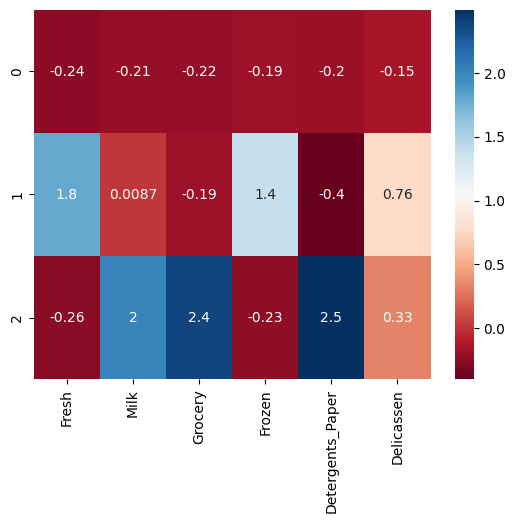

In [30]:
# 2.Plot the cluster centers
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

3. Name the clusters:

* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh and Frozen Items**
* Cluster 2: **More Milk, Grocery and Paper Items**

## 4. Predict the Cluster of a New Client using KMeans predict

In [31]:
# 1. Given this new client, determine which cluster they fall into
new_client = pd.DataFrame([np.array([20000, 20000, 25000, 600, 20000, 1000])], columns=data.columns)
new_client

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,20000,20000,25000,600,20000,1000


In [32]:
# 2. Scale the new client data using the same scaler object from the Data Prep step
new_client_scaled = pd.DataFrame(scaler.transform(new_client), columns=data.columns)
new_client_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.633241,1.926718,1.796047,-0.509766,3.594487,-0.186329


In [33]:
# 3. Make a prediction using the K-Means model with 3 clusters

In [34]:
cluster_id = kmeans3.predict(new_client_scaled)[0]
print("New client cluster:", cluster_id)

New client cluster: 2


4. Clearly state what you would recommend as client segments and how you would better support those clients

* **Typical clients**: make sure our sales team is knowledgeable about a variety of products
* **Clients who purchase a lot of fresh and frozen foods**: make sure to prioritize these clients when shipping them fresh foods
* **Clients who purchase a lot of milk, grocery, detergents and paper items**: make sure to keep them up to date on new non-perishable items

### 5. (Optional) This session is optional, it is not mandatory for submission.
- Tune the parameter for K-Means:
1. Write a loop to fit models with 2-15 clusters for KMeans
2. Plot Elbow method 
3. Identify the elbow of the plot and fit a KMeans model just for that number of clusters
4. Find the number of clients in each cluster
5. Create a heat map of the cluster centers
6. create a silhouette scores plot instead of an inertia plot
- Tune DBSCAN
1. write a tune_dbscan function to loop through of the combinations of eps and min_samples
2. apply the dune_dbscan function on the scaled data
3. sort the results by highest silhouette score

#### 5.1 Tune K-Means

In [66]:
# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

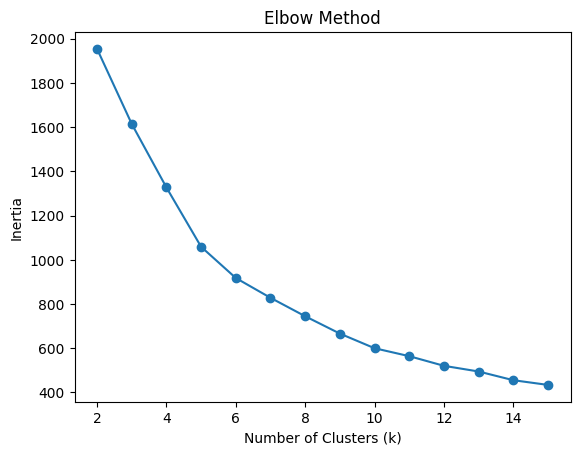

In [72]:
# 2. Create Elbow method plot

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2,16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method");

In [73]:
# 3. Identify the elbow of the plot and fit a KMeans model just for that number of clusters
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans5.fit(data_scaled)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [74]:
# 4. Find the number of clients in each cluster
from collections import Counter

Counter(kmeans5.labels_)

Counter({np.int32(3): 272,
         np.int32(0): 96,
         np.int32(1): 59,
         np.int32(2): 11,
         np.int32(4): 2})

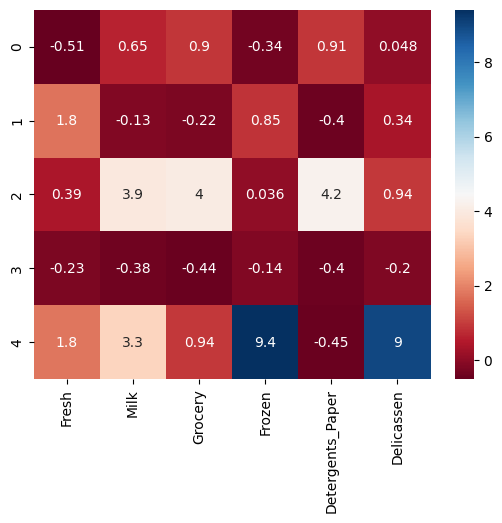

In [75]:
# 5. Create a heat map of the cluster centers
import seaborn as sns

cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers5, cmap='RdBu', annot=True);

In [76]:
# Name the clusters

* Cluster 0: **More Milk, Grocery and Paper Items**
* Cluster 1: **More Fresh and Frozen Items**
* Cluster 2: **More of Everything**
* Cluster 3: **Little of Everything**
* Cluster 4: **Lots of Frozen + Deli Items**

In [36]:
# 6. create a silhouette scores plot instead of an inertia plot

from sklearn.metrics import silhouette_score

# create an empty list to hold many silhouette score values
silhouette_scores = []

# create 2 - 15 clusters, and add the silhouette scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_, metric='euclidean', sample_size=None))

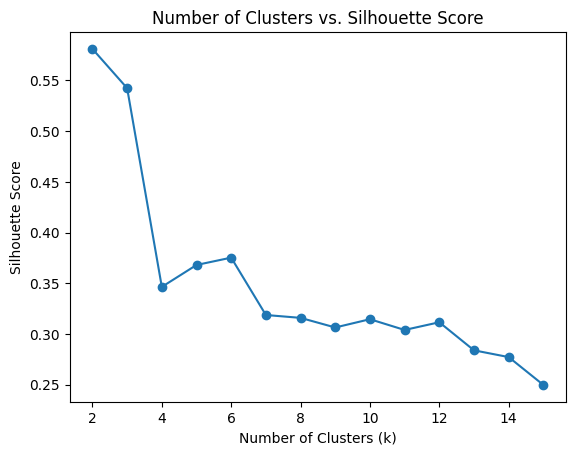

In [37]:
# plot the silhouette scores

# turn the list into a series for plotting
silhouette_series = pd.Series(silhouette_scores, index=range(2, 16))

# plot the data
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

In [38]:
#  Identify the Silhouette score of the plot and fit a KMeans model just for that number of clusters
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data_scaled)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [39]:
print(silhouette_series)

2     0.581087
3     0.542401
4     0.346464
5     0.368072
6     0.375310
7     0.318751
8     0.315929
9     0.306440
10    0.314599
11    0.304004
12    0.311603
13    0.283927
14    0.277262
15    0.249816
dtype: float64


#### 5.2 Tune DBSCAN

In [40]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 5, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [41]:
dbscan_results = tune_dbscan(data_scaled)
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN


In [42]:
dbscan_results.sort_values(by='Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
256,3.3,2,2,8,0.740284
248,3.2,2,2,8,0.740284
264,3.4,2,2,8,0.740284
272,3.5,2,2,8,0.740284
200,2.6,2,2,10,0.582247
...,...,...,...,...,...
387,4.9,5,1,5,NaN
388,4.9,6,1,5,NaN
389,4.9,7,1,5,NaN
390,4.9,8,1,6,NaN


End of Solution